In [ ]:
!pip install pycaret

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/distan_lat42.3394lon-8.8339p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
#px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance',
                          #color_continuous_scale=px.colors.cyclical.IceFire,)

In [3]:
#ria forecast do
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/lat42.3394lon-8.8339p4R4KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,prec0,swflx0,shflx0,cape0,cin0,cfh0,cfl0,cfm0,cft0,HGT5000,HGT8500,T5000,T8500,dir1,snow_prec1,snowlevel1,mod1,wind_gust1,mslp1,temp1,rh1,visibility1,lhflx1,lwflx1,conv_prec1,prec1,swflx1,shflx1,...,lwflx2,conv_prec2,prec2,swflx2,shflx2,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502,dir3,snow_prec3,snowlevel3,mod3,wind_gust3,mslp3,temp3,rh3,visibility3,lhflx3,lwflx3,conv_prec3,prec3,swflx3,shflx3,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-11 01:00:00,190.099930,0.0,1893.174805,7.264744,9.906267,102328.617188,286.506866,0.942528,24038.736328,14.788114,323.512573,0.0,0.000,0.0,-3.093262,15.389000,-4.905941,0.578125,0.400000,0.0,0.578125,5699.246094,1531.535034,259.280243,278.426575,192.110916,0.0,1885.281006,7.263834,9.906267,102318.156250,286.710876,0.933628,24038.736328,11.988113,325.012573,0.0,0.000,0.0,-6.793262,...,324.812561,0.0,0.000,0.0,-7.793262,18.525000,-5.510942,0.554688,0.300000,0.0,0.554688,5700.638184,1534.107056,259.250244,278.526550,195.192032,0.0,1895.229614,7.380077,10.006268,102319.023438,286.778870,0.933528,24038.736328,10.288114,324.512573,0.0,0.000,0.0,-8.293262,17.961000,-6.377942,0.554688,0.300000,0.0,0.554688,5699.585938,1533.610962,259.245239,278.456573
2021-03-11 02:00:00,197.163528,0.0,1873.695435,8.319744,10.389208,102301.453125,286.556366,0.946013,24232.718750,15.259779,366.894470,0.0,0.016,0.0,-4.528906,23.504000,-4.777394,0.515625,0.500000,0.0,0.515625,5693.067871,1528.592041,259.045258,278.295227,198.383011,0.0,1864.695801,8.292401,10.389208,102291.609375,286.717377,0.941113,24232.718750,11.459780,368.994476,0.0,0.001,0.0,-8.428906,...,368.894470,0.0,0.000,0.0,-8.228907,27.945999,-4.155395,0.500000,0.500000,0.0,0.500000,5694.711914,1531.004028,259.012238,278.385223,198.908875,0.0,1871.833130,7.884734,10.389208,102291.593750,286.756378,0.941513,24232.718750,9.059779,368.894470,0.0,0.000,0.0,-8.828906,28.046000,-5.044394,0.468750,0.500000,0.0,0.500000,5693.571777,1530.416016,259.013245,278.285248
2021-03-11 03:00:00,199.934814,0.0,1794.957031,8.281711,10.366445,102251.437500,286.592987,0.946405,24232.691406,14.275503,370.195892,0.0,0.006,0.0,-5.123437,36.521999,-5.648910,0.328125,0.710938,0.0,0.710938,5681.936035,1523.298950,258.969757,277.528229,201.540405,0.0,1800.228394,8.262547,10.666445,102241.101562,286.730988,0.943105,24232.691406,10.375504,369.995911,0.0,0.000,0.0,-8.523438,...,370.195892,0.0,0.000,0.0,-7.923438,36.584000,-5.128910,0.328125,0.710938,0.0,0.710938,5683.543945,1525.718994,258.963745,277.678253,203.760620,0.0,1809.120117,7.752617,10.266444,102241.679688,286.755005,0.938905,24232.691406,9.775503,369.995911,0.0,0.000,0.0,-8.623438,34.166000,-5.027910,0.312500,0.742188,0.0,0.742188,5682.295898,1525.256958,258.975739,277.668243
2021-03-11 04:00:00,207.470184,0.0,1775.944458,8.031638,9.995256,102274.250000,286.580994,0.945543,23234.199219,14.194679,371.735779,0.0,0.206,0.0,-4.743018,39.799999,-1.835531,0.132812,0.750000,0.0,0.750000,5675.325195,1524.307983,259.038696,277.319489,209.639755,0.0,1788.402832,8.118349,10.095257,102264.773438,286.712006,0.941543,24234.199219,11.094679,372.835785,0.0,0.117,0.0,-8.043017,...,372.335785,0.0,0.215,0.0,-7.743018,40.549999,-2.235531,0.132812,0.703125,0.0,0.703125,5677.024902,1526.326050,259.023682,277.569489,212.121552,0.0,1799.808350,7.776487,9.895257,102267.968750,286.739990,0.934243,23434.199219,11.694679,372.435791,0.0,0.255,0.0,-8.343018,39.540001,-2.237531,0.132812,0.664062,0.0,0.664062,5675.765137,1525.725952,259.033691,277.559479
2021-03-11 05:00:00,210.838715,0.0,1862.883057,7.983945,10.451688,102301.382812,286.598877,0.942787,24233.667969,14.755339,369.559784,0.0,0.250,0.0,-4.778052,51.700001,-0.672668,0.218750,0.500000,0.0,0.500000,5669.366211,1523.831055,258.927368,278.218933,211.705994,0.0,1863.587402,8.186982,10.65

In [4]:
#label meteorological variable
interval=pd.IntervalIndex.from_tuples([(-0.5,20), (20, 40), (40, 60),
                                       (60,80),(80,100),(100,120),(120,140),(140,160),
                                       (160,180),(180,200),(200,220),(220,240),
                                       (240,260),(260,280),(280,300),(300,320),
                                       (320,340),(340,360)])
labels=['[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]', '(100, 120]',
        '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]', '(200, 220]',
        '(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]','(300, 320]',
        '(320, 340]', '(340, 360]']
ria_model4k["dir0_l"]=pd.cut(ria_model4k["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str) 
ria_model4k[["dir0_l","dir0"]]       

,dir0_l,dir0
time,,
2021-03-11 01:00:00,"(180, 200]",190.099930
2021-03-11 02:00:00,"(180, 200]",197.163528
2021-03-11 03:00:00,"(180, 200]",199.934814
2021-03-11 04:00:00,"(200, 220]",207.470184
2021-03-11 05:00:00,"(200, 220]",210.838715
...,...,...
2022-01-19 19:00:00,"(20, 40]",37.065769
2022-01-19 20:00:00,"(20, 40]",38.196930
2022-01-19 21:00:00,"[0, 20]",19.564066


In [5]:
#station dir variable variable every 10 minutes º
station=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/ria_enm_windplus.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
station.head(15)

,spd_udr,spd_san,spd_mar,spd_cor,spd_ons,dir_cor,dir_mar,dir_udr,dir_ons,dir_san,spdd_cor,spdd_mar,spdd_udr,spdd_ons,spdd_san,dird_cor,dird_mar,dird_udr,dird_ons,dird_san,guss_cor,guss_mar,guss_udr,guss_ons,guss_san
time,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-11 00:10:00,25.6,15.7,18.1,26.6,28.2,218.0,214.0,198.0,216.0,205.0,4.9,4.1,3.9,3.7,5.4,11.0,13.0,8.0,8.0,24.0,37.5,31.4,33.2,37.2,29.5
2021-03-11 00:20:00,26.4,12.6,16.8,27.4,29.2,222.0,206.0,196.0,226.0,207.0,4.5,3.6,4.2,3.2,5.3,10.0,13.0,8.0,7.0,23.0,36.1,26.6,35.9,36.2,24.4
2021-03-11 00:30:00,29.5,13.7,14.7,26.9,27.2,222.0,221.0,197.0,218.0,208.0,5.0,3.8,4.1,3.6,4.6,10.0,12.0,8.0,6.0,22.0,39.7,27.3,39.0,35.1,25.7
2021-03-11 00:40:00,30.4,12.2,13.5,27.3,26.8,223.0,221.0,204.0,212.0,217.0,4.7,3.9,4.3,4.1,4.9,11.0,14.0,7.0,8.0,30.0,39.7,26.2,38.3,35.3,26.2
2021-03-11 00:50:00,29.8,11.0,14.4,23.3,24.6,217.0,220.0,199.0,208.0,237.0,4.9,3.6,4.6,3.4,5.6,11.0,15.0,8.0,8.0,34.0,36.6,26.7,39.1,33.8,22.8
2021-03-11 01:00:00,31.3,8.9,15.5,23.1,28.4,217.0,214.0,196.0,222.0,240.0,4.4,3.8,4.6,4.1,4.7,11.0,14.0,8.0,10.0,30.0,33.0,24.9,41.8,39.0,26.1
2021-03-11 01:10:00,28.5,14.5,13.3,24.2,26.1,217.0,219.0,199.0,235.0,208.0,4.3,3.3,4.4,3.8,5.4,10.0,16.0,8.0,8.0,26.0,34.2,21.9,38.2,38.1,28.8
2021-03-11 01:20:00,30.5,13.9,14.9,25.9,28.0,215.0,222.0,201.0,221.0,204.0,5.1,3.8,4.5,3.0,5.1,10.0,18.0,8.0,7.0,25.0,39.4,25.3,41.3,36.0,26.7
2021-03-11 01:30:00,32.5,8.7,18.1,24.3,24.9,213.0,214.0,208.0,214.0,221.0,4.9,5.7,4.3,4.0,5.5,10.0,15.0,8.0,8.0,37.0,36.1,38.4,43.6,34.6,28.9


In [6]:
#resample mean direction hour before
station=station.resample("H",label="right").mean().dropna()
station

,spd_udr,spd_san,spd_mar,spd_cor,spd_ons,dir_cor,dir_mar,dir_udr,dir_ons,dir_san,spdd_cor,spdd_mar,spdd_udr,spdd_ons,spdd_san,dird_cor,dird_mar,dird_udr,dird_ons,dird_san,guss_cor,guss_mar,guss_udr,guss_ons,guss_san
time,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-11 01:00:00,28.340000,13.040000,15.500000,26.300000,27.200000,220.400000,216.400000,198.800000,216.000000,214.800000,4.800000,3.800000,4.220000,3.600000,5.160000,10.600000,13.400000,7.800000,7.400000,26.600000,37.920000,27.640000,37.100000,35.520000,25.720000
2021-03-11 02:00:00,29.516667,11.000000,16.516667,23.433333,25.416667,214.166667,218.500000,201.166667,216.833333,219.000000,4.516667,4.700000,4.166667,3.900000,4.933333,10.166667,15.166667,8.166667,8.666667,29.500000,34.683333,30.450000,39.116667,34.933333,25.916667
2021-03-11 03:00:00,26.950000,4.850000,19.350000,17.983333,25.000000,209.000000,198.500000,182.000000,203.333333,179.000000,4.416667,3.933333,2.566667,4.200000,3.150000,12.833333,14.166667,5.333333,9.500000,34.166667,28.233333,29.083333,33.000000,34.850000,12.916667
2021-03-11 04:00:00,29.283333,7.916667,20.650000,18.716667,24.900000,204.500000,204.666667,191.666667,200.333333,203.500000,4.900000,4.850000,4.100000,4.166667,4.716667,14.333333,13.666667,7.166667,10.000000,38.500000,30.716667,32.766667,38.066667,35.066667,21.850000
2021-03-11 05:00:00,32.633333,5.633333,21.433333,18.350000,23.616667,199.500000,199.333333,181.833333,190.666667,177.333333,5.216667,4.816667,2.800000,5.000000,3.500000,15.333333,13.500000,5.000000,12.333333,37.166667,31.416667,33.950000,39.566667,34.766667,16.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19 21:00:00,5.500000,2.116667,4.150000,31.483333,20.900000,38.833333,70.333333,73.000000,25.666667,30.500000,3.183333,1.416667,1.433333,1.966667,1.083333,4.500000,28.833333,17.166667,7.000000,21.333333,38.850000,7.483333,9.233333,26.016667,4.683333
2022-01-19 22:00:00,7.416667,2.583333,6.833333,35.433333,22.483333,33.333333,74.833333,58.500000,16.000000,30.000000,3.883333,2.033333,2.383333,3.250000,1.416667,6.666667,20.333333,18.666667,7.500000,32.500000,45.933333,12.300000,13.233333,30.216667,5.883333
2022-01-19 23:00:00,8.333333,2.016667,10.700000,32.250000,21.133333,33.500000,77.666667,37.833333,31.333333,32.833333,3.200000,2.183333,1.650000,3.583333,1.316667,6.500000,10.666667,9.500000,9.666667,22.666667,39.666667,16.050000,12.616667,29.866667,5.116667


In [7]:
#dir to interval
interval=pd.IntervalIndex.from_tuples([(-0.5,20), (20, 40), (40, 60),
                                       (60,80),(80,100),(100,120),(120,140),(140,160),
                                       (160,180),(180,200),(200,220),(220,240),
                                       (240,260),(260,280),(280,300),(300,320),
                                       (320,340),(340,360)])
labels=['[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]', '(100, 120]',
        '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]', '(200, 220]',
        '(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]','(300, 320]',
        '(320, 340]', '(340, 360]']
station["dir_udr_l"]=pd.cut(station["dir_udr"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

# put var when dird>=20
station.loc[station['dird_udr'] >= 20, 'dir_udr_l'] = "variable"
station[["dir_udr_l","dir_udr","dird_udr","spd_udr"]].sample(15)


,dir_udr_l,dir_udr,dird_udr,spd_udr
time,,,,
2021-06-16 13:00:00,"(180, 200]",195.833333,6.833333,26.233333
2021-10-30 01:00:00,"(320, 340]",326.000000,9.000000,23.533333
2021-04-08 16:00:00,"(200, 220]",204.000000,6.500000,24.500000
2022-01-18 08:00:00,"(60, 80]",61.833333,10.000000,11.050000
2021-07-16 21:00:00,"(160, 180]",172.166667,15.500000,6.800000
2022-01-04 00:00:00,"(180, 200]",181.833333,5.833333,59.816667
2021-06-01 16:00:00,"(200, 220]",210.166667,7.166667,16.416667
2021-10-11 17:00:00,variable,260.000000,21.000000,2.533333
2021-11-01 23:00:00,"(260, 280]",263.166667,14.500000,17.283333


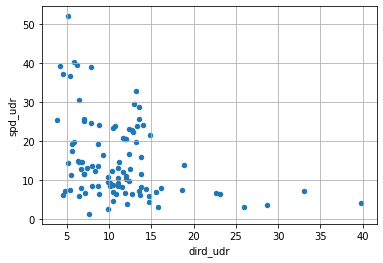

In [8]:
station.sample(100).plot.scatter(x='dird_udr',y='spd_udr',grid=True);

In [9]:
df_all4k=pd.concat([station["dir_udr_l"],ria_model4k],axis=1).dropna()
df_all4k.head(25)

,dir_udr_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,prec0,swflx0,shflx0,cape0,cin0,cfh0,cfl0,cfm0,cft0,HGT5000,HGT8500,T5000,T8500,dir1,snow_prec1,snowlevel1,mod1,wind_gust1,mslp1,temp1,rh1,visibility1,lhflx1,lwflx1,conv_prec1,prec1,swflx1,...,conv_prec2,prec2,swflx2,shflx2,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502,dir3,snow_prec3,snowlevel3,mod3,wind_gust3,mslp3,temp3,rh3,visibility3,lhflx3,lwflx3,conv_prec3,prec3,swflx3,shflx3,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503,dir0_l
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-11 01:00:00,"(180, 200]",190.099930,0.0,1893.174805,7.264744,9.906267,102328.617188,286.506866,0.942528,24038.736328,14.788114,323.512573,0.0,0.000,0.000000e+00,-3.093262,15.389000,-4.905941,0.578125,0.400000,0.000000,0.578125,5699.246094,1531.535034,259.280243,278.426575,192.110916,0.0,1885.281006,7.263834,9.906267,102318.156250,286.710876,0.933628,24038.736328,11.988113,325.012573,0.0,0.000,0.000000e+00,...,0.0,0.000,0.000000e+00,-7.793262,18.525000,-5.510942,0.554688,0.300000,0.000000,0.554688,5700.638184,1534.107056,259.250244,278.526550,195.192032,0.0,1895.229614,7.380077,10.006268,102319.023438,286.778870,0.933528,24038.736328,10.288114,324.512573,0.0,0.000,0.000000,-8.293262,17.961000,-6.377942,0.554688,0.300000,0.000000,0.554688,5699.585938,1533.610962,259.245239,278.456573,"(180, 200]"
2021-03-11 02:00:00,"(200, 220]",197.163528,0.0,1873.695435,8.319744,10.389208,102301.453125,286.556366,0.946013,24232.718750,15.259779,366.894470,0.0,0.016,0.000000e+00,-4.528906,23.504000,-4.777394,0.515625,0.500000,0.000000,0.515625,5693.067871,1528.592041,259.045258,278.295227,198.383011,0.0,1864.695801,8.292401,10.389208,102291.609375,286.717377,0.941113,24232.718750,11.459780,368.994476,0.0,0.001,0.000000e+00,...,0.0,0.000,0.000000e+00,-8.228907,27.945999,-4.155395,0.500000,0.500000,0.000000,0.500000,5694.711914,1531.004028,259.012238,278.385223,198.908875,0.0,1871.833130,7.884734,10.389208,102291.593750,286.756378,0.941513,24232.718750,9.059779,368.894470,0.0,0.000,0.000000,-8.828906,28.046000,-5.044394,0.468750,0.500000,0.000000,0.500000,5693.571777,1530.416016,259.013245,278.285248,"(180, 200]"
2021-03-11 03:00:00,"(180, 200]",199.934814,0.0,1794.957031,8.281711,10.366445,102251.437500,286.592987,0.946405,24232.691406,14.275503,370.195892,0.0,0.006,0.000000e+00,-5.123437,36.521999,-5.648910,0.328125,0.710938,0.000000,0.710938,5681.936035,1523.298950,258.969757,277.528229,201.540405,0.0,1800.228394,8.262547,10.666445,102241.101562,286.730988,0.943105,24232.691406,10.375504,369.995911,0.0,0.000,0.000000e+00,...,0.0,0.000,0.000000e+00,-7.923438,36.584000,-5.128910,0.328125,0.710938,0.000000,0.710938,5683.543945,1525.718994,258.963745,277.678253,203.760620,0.0,1809.120117,7.752617,10.266444,102241.679688,286.755005,0.938905,24232.691406,9.775503,369.995911,0.0,0.000,0.000000,-8.623438,34.166000,-5.027910,0.312500,0.742188,0.000000,0.742188,5682.295898,1525.256958,258.975739,277.668243,"(180, 200]"
2021-03-11 04:00:00,"(180, 200]",207.470184,0.0,1775.944458,8.031638,9.995256,102274.250000,286.580994,0.945543,23234.199219,14.194679,371.735779,0.0,0.206,0.000000e+00,-4.743018,39.799999,-1.835531,0.132812,0.750000,0.000000,0.750000,5675.325195,1524.307983,259.038696,277.319489,209.639755,0.0,1788.402832,8.118349,10.095257,102264.773438,286.712006,0.941543,24234.199219,11.094679,372.835785,0.0,0.117,0.000000e+00,...,0.0,0.215,0.000000e+00,-7.743018,40.549999,-2.235531,0.132812,0.703125,0.000000,0.703125,5677.024902,1526.326050,259.023682,277.569489,212.121552,0.0,1799.808350,7.776487,9.895257,102267.968750,286.739990,0.934243,23434.199219,11.694679,372.435791,0.0,0.255,0.000000,-8.343018,39.540001,-2.237531,0.132812,0.664062,0.000000,0.664062,5675.765137,1525.725952,259.033691,277.559479,"(200, 220]"
2021-03-11 05:00:00,"(180, 200]",210.838715,0.0,1862.883057,7.983945,10.451688,102301

In [10]:
df_all4k[["dir0_l","dir0","dir_udr_l"]]

,dir0_l,dir0,dir_udr_l
time,,,
2021-03-11 01:00:00,"(180, 200]",190.099930,"(180, 200]"
2021-03-11 02:00:00,"(180, 200]",197.163528,"(200, 220]"
2021-03-11 03:00:00,"(180, 200]",199.934814,"(180, 200]"
2021-03-11 04:00:00,"(200, 220]",207.470184,"(180, 200]"
2021-03-11 05:00:00,"(200, 220]",210.838715,"(180, 200]"
...,...,...,...
2022-01-19 19:00:00,"(20, 40]",37.065769,variable
2022-01-19 20:00:00,"(20, 40]",38.196930,"(40, 60]"
2022-01-19 21:00:00,"[0, 20]",19.564066,"(60, 80]"


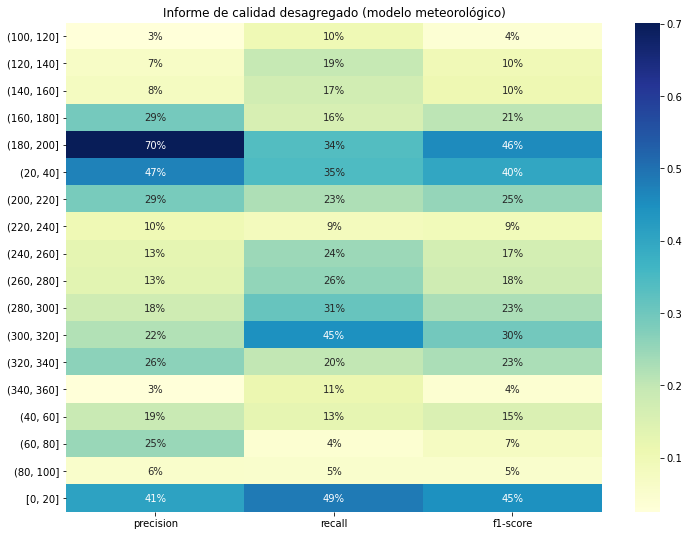

In [38]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (modelo meteorológico)")
import seaborn as sns
df_novar = df_all4k.drop(df_all4k[df_all4k.dir_udr_l == "variable" ].index)
cr=pd.DataFrame(classification_report(df_novar.dir_udr_l, df_novar.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


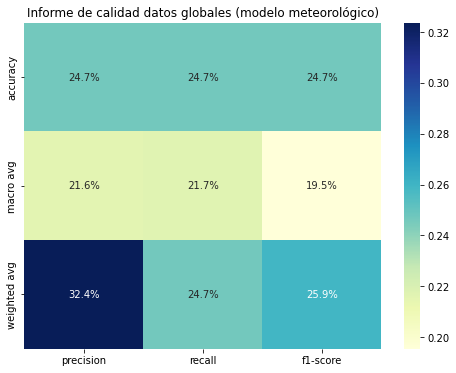

In [40]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (modelo meteorológico)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

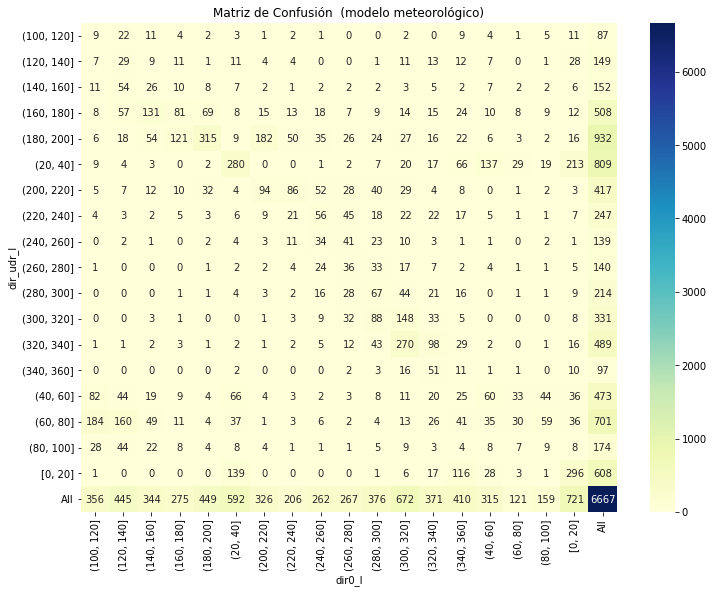

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión  (modelo meteorológico)")
import seaborn as sns
global_sc=pd.crosstab(df_novar.dir_udr_l, df_novar.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

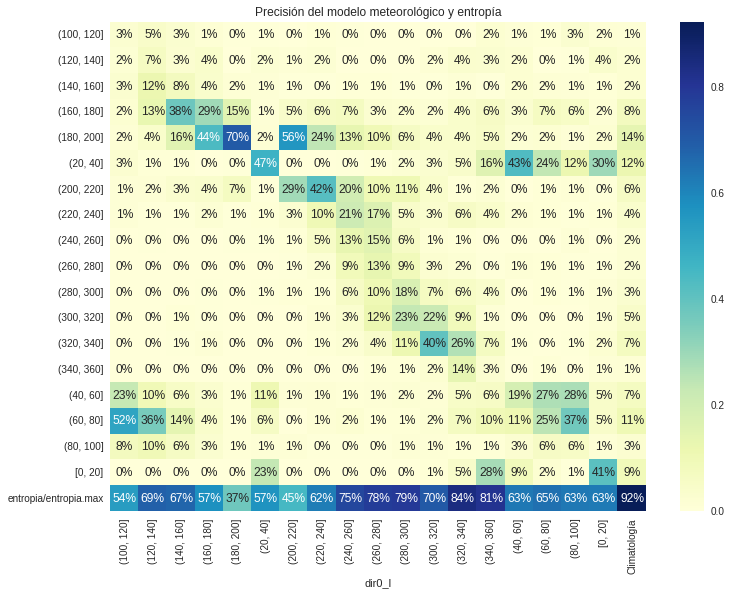

In [55]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo meteorológico y entropía")
column_sc=pd.crosstab(df_novar.dir_udr_l, df_novar.dir0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');
#column_sc

In [42]:
from pycaret.classification import *

clas = setup(df_all4k.drop(columns=["dir0_l"]), normalize=False, target = 'dir_udr_l') 


,Description,Value
0,session_id,7096
1,Target,dir_udr_l
2,Target Type,Multiclass
3,Label Encoded,"(100, 120]: 0, (120, 140]: 1, (140, 160]: 2, (..."
4,Original Data,"(7190, 101)"
5,Missing Values,False
6,Numeric Features,100
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.4451,0.8729,0.3125,0.4174,0.4206,0.3948,0.3961,2.9833
et,Extra Trees Classifier,0.4447,0.8713,0.3256,0.4198,0.4236,0.3948,0.3959,1.2767
lightgbm,Light Gradient Boosting Machine,0.4364,0.8671,0.3083,0.4091,0.4120,0.3849,0.3860,14.7300
gbc,Gradient Boosting Classifier,0.4072,0.8573,0.2829,0.3816,0.3882,0.3552,0.3561,101.9633
lda,Linear Discriminant Analysis,0.3451,0.8219,0.2570,0.3351,0.3349,0.2908,0.2915,0.1267
ridge,Ridge Classifier,0.3380,0.0000,0.1833,0.2832,0.2678,0.2679,0.2752,0.0867
dt,Decision Tree Classifier,0.3187,0.6344,0.2275,0.3241,0.3205,0.2643,0.2644,0.4533
knn,K Neighbors Classifier,0.3061,0.7364,0.2054,0.2956,0.2886,0.2444,0.2457,1.5667
lr,Logistic Regression,0.2964,0.7759,0.1586,0.2064,0.2129,0.2206,0.2301,9.1233
ada,Ada Boost Classifier,0.2372,0.6865,0.1538,0.2081,0.1984,0.1727,0.1774,2.3167


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4947, verbose=0,
                       warm_start=False)

In [43]:
lightgbm=create_model("lightgbm",n_estimators=150,fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4312,0.8551,0.3048,0.4008,0.4103,0.3806,0.3814
1,0.4082,0.8499,0.2873,0.3846,0.3904,0.3555,0.3563
Mean,0.4197,0.8525,0.2960,0.3927,0.4004,0.3680,0.3688
SD,0.0115,0.0026,0.0088,0.0081,0.0099,0.0125,0.0126


In [ ]:
#full version required
preds=predict_model(lightgbm,drift_report=True)

In [ ]:
plot_model(lightgbm,plot ="confusion_matrix",plot_kwargs={"percent":True})

In [ ]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [45]:
x_var=get_config("X_train").columns
x_var

Index(['dir0', 'snow_prec0', 'mod0', 'wind_gust0', 'temp0', 'rh0',
       'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0', 'prec0', 'swflx0',
       'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0', 'cft0', 'HGT5000',
       'T5000', 'T8500', 'dir1', 'snow_prec1', 'mod1', 'wind_gust1', 'mslp1',
       'temp1', 'rh1', 'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1',
       'prec1', 'swflx1', 'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
       'cft1', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2', 'wind_gust2',
       'temp2', 'rh2', 'visibility2', 'lhflx2', 'lwflx2', 'conv_prec2',
       'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2', 'cfh2', 'cfl2', 'cfm2',
       'cft2', 'dir3', 'snow_prec3', 'mod3', 'wind_gust3', 'rh3',
       'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3', 'prec3', 'swflx3',
       'shflx3', 'cape3', 'cin3', 'cfh3', 'cfl3', 'cfm3', 'cft3'],
      dtype='object')

**Export model**

In [46]:
Y=df_all4k.dir_udr_l
X=df_all4k[x_var]

In [ ]:
X.sample(30)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
ml_model=LGBMClassifier(n_estimators=150).fit(X_train,y_train)


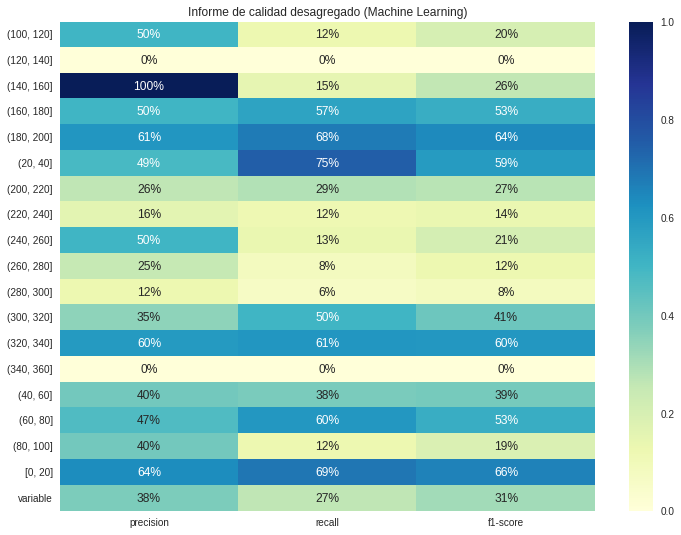

In [53]:
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


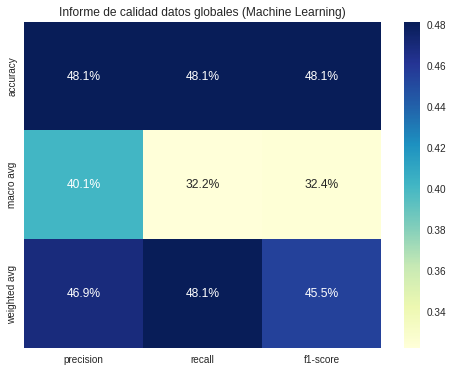

In [54]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (Machine Learning)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

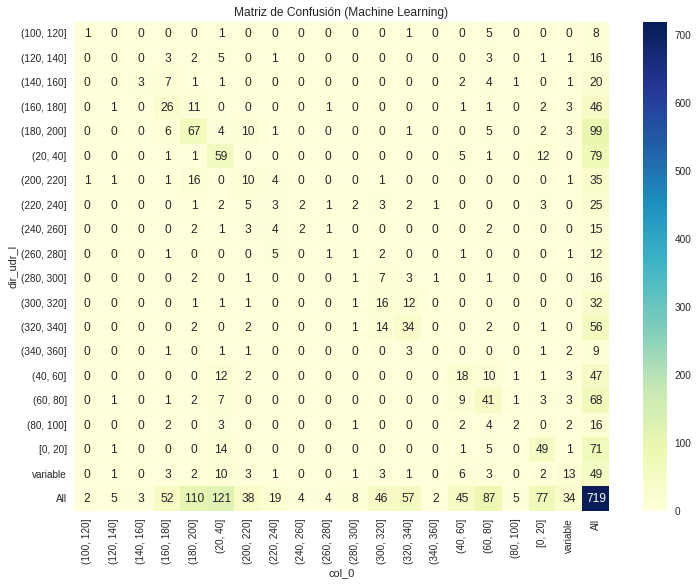

In [56]:
plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

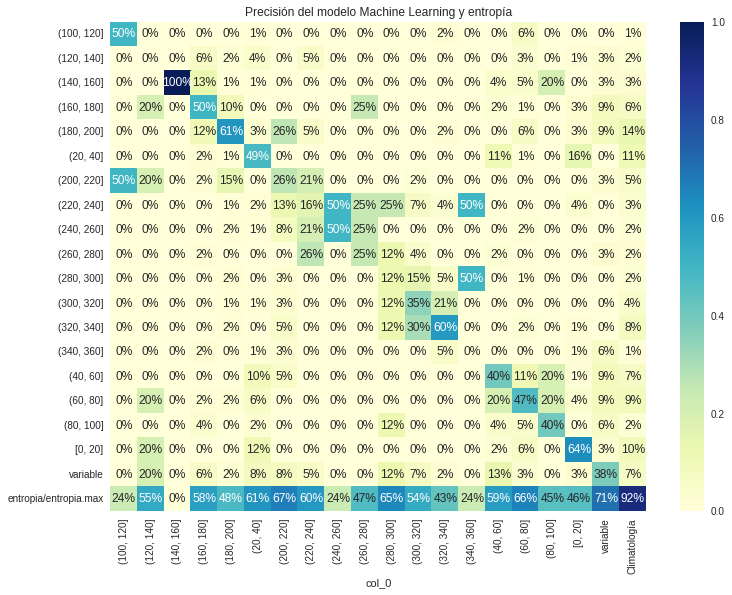

In [57]:
plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo Machine Learning y entropía")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [58]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("dir_udr_d0.al", 'wb'))